In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from FileOpener.CSVReader.CSVReader import CSVReader as csv

In [8]:
price_dir = 'CSVFile/Price/Korea/Stocks'
opincome_dir = 'CSVFile/FinancialData/Korea'


kdq_price = csv.price_reader(filename='KOSDAQ_FROM_1998_close.csv', directory=price_dir)
kse_price = csv.price_reader(filename='KOSDAQ_FROM_1998_close.csv', directory=price_dir)

kdq_op_income = csv.financial_reader(filename='OP_INCOME_KDQ.csv', directory=opincome_dir)
kse_op_income = csv.financial_reader(filename='OP_INCOME_KSE.csv', directory=opincome_dir)

## 재무 데이터 유니버스 선정

영업이익 전년대비 25% 상승 이상

In [27]:
kdq_op_ic_yoy = kdq_op_income.shift(1).pct_change(periods=4).dropna(axis=0, how='all') > 0.25

In [28]:
kdq_op_ic_yoy.head()

,A000250,A000440,A001000,A001540,A001810,A001840,A002230,A002290,A002680,A002800,...,A900280,A900290,A900300,A900310,A900340,A950110,A950130,A950140,A950160,A950170
Code,,,,,,,,,,,,,,,,,,,,,
2001-06-30,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2001-09-30,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2001-12-31,False,False,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2002-03-31,False,False,False,True,False,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2002-06-30,False,True,False,True,True,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
## 25% 이상 주식의 수

kdq_op_ic_yoy.sum(axis = 1).head()

Code
2001-06-30     51
2001-09-30     64
2001-12-31     83
2002-03-31     79
2002-06-30    106
dtype: int64

In [36]:
kdq_op_ic_yoy.sum(axis = 1).tail()

Code
2017-09-30    342
2017-12-31    365
2018-03-31    292
2018-06-30    362
2018-09-30    364
dtype: int64

In [30]:
idices = kdq_op_ic_yoy.index

stocks = {}

for idx in idices:
    
    stocks[idx] = (kdq_op_ic_yoy.loc[idx][kdq_op_ic_yoy.loc[idx] == True]).index

## 수익률

In [50]:
price_rt = kdq_price.pct_change().loc['2001-06-30':'2018-09-30']

## 백테스트

In [56]:
norm_dates = kdq_op_ic_yoy.index
n_starts = norm_dates[:-1]
starts = n_starts + pd.tseries.offsets.MonthBegin()
ends = norm_dates[1:]

In [69]:
ret_data = pd.Series()

for n_start, start, end in zip(list(n_starts), list(starts), list(ends)):
    
    ret_data = pd.concat([ret_data, price_rt[stocks[n_start]].loc[start:end].mean(axis=1)])


## Performance Analytics

In [107]:
from pf_anlysis import PfAnalysis as pf

In [108]:
kdq_op_25_ret = pf(ret_data)

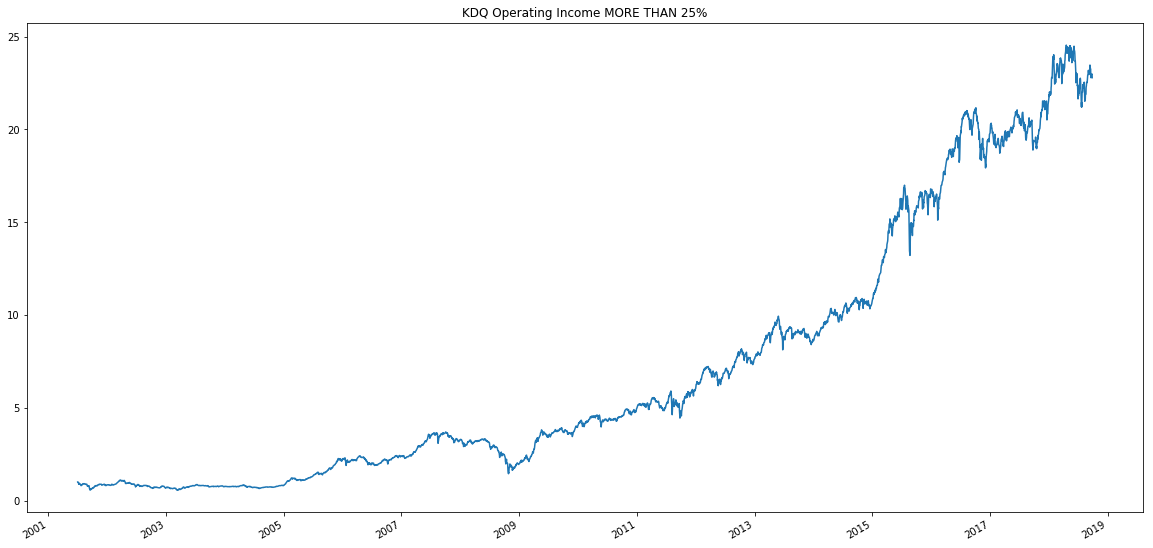

In [85]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)

ax.set_title('KDQ Operating Income MORE THAN 25%')
kdq_op_25_ret.cumReturn().plot(ax = ax)

In [103]:
# 1년
max_drawdown = kdq_op_25_ret.maxDrawDown(windows=252)
print(f"Maximum Drawdown for the strategy is {abs(round(max_drawdown*100, 2))}%")
print(f"Total Return on the strategyis {abs(round((kdq_op_25_ret.data.prod() * 100),2))}%")

Maximum Drawdown for the strategy is 58.72%
Total Return on the strategyis 2278.26%


In [111]:
(kdq_op_25_ret.data.resample('A').prod().sub(1)).apply(lambda x: "{:,.2%}".format(x))

2001-12-31    -15.56%
2002-12-31    -20.40%
2003-12-31     14.72%
2004-12-31      6.24%
2005-12-31    163.60%
2006-12-31     11.19%
2007-12-31     35.99%
2008-12-31    -39.78%
2009-12-31    104.03%
2010-12-31     22.94%
2011-12-31     20.93%
2012-12-31     27.07%
2013-12-31     14.66%
2014-12-31     22.50%
2015-12-31     57.73%
2016-12-31     17.45%
2017-12-31      8.20%
2018-12-31      6.76%
Freq: A-DEC, dtype: object